<a href="https://colab.research.google.com/github/biankaa/test/blob/master/keras_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
print(tf.__version__)

1.13.1


In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

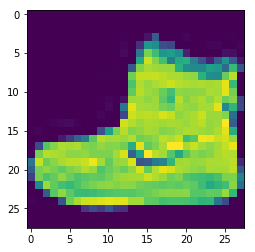

In [0]:
plt.figure()
plt.imshow(train_images[0])

In [0]:
train_images[0].shape

(28, 28)

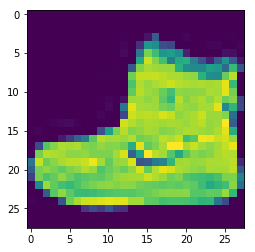

In [0]:
w = train_images[0]/255
plt.figure()
plt.imshow( w )

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

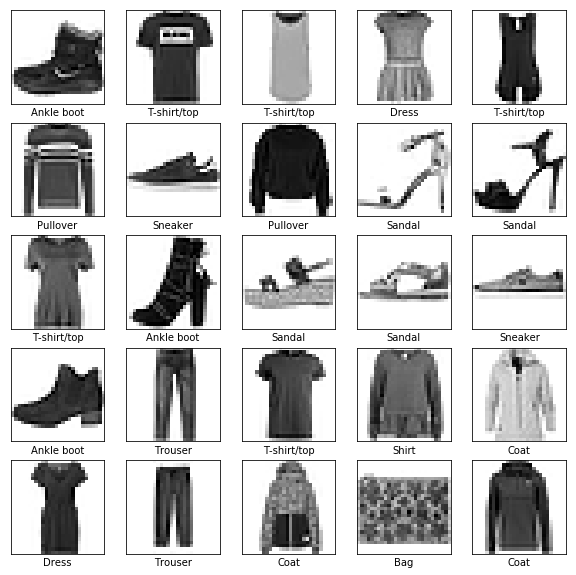

In [0]:
plt.figure(figsize = (10, 10))
for i in range (25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation = tf.nn.relu),
    keras.layers.Dense(10, activation = tf.nn.softmax)   
])

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 7s 117us/sample - loss: 0.4943 - acc: 0.8253
Epoch 2/5
60000/60000 [==============================] - 7s 114us/sample - loss: 0.3742 - acc: 0.8640
Epoch 3/5
60000/60000 [==============================] - 7s 125us/sample - loss: 0.3353 - acc: 0.8777
Epoch 4/5
60000/60000 [==============================] - 7s 125us/sample - loss: 0.3112 - acc: 0.8851
Epoch 5/5
60000/60000 [==============================] - 7s 112us/sample - loss: 0.2926 - acc: 0.8925


In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

10000/10000 [==============================] - 1s 55us/sample - loss: 0.3452 - acc: 0.8803
Test accuracy: 0.8803


In [0]:
predictions = model.predict(test_images)

In [0]:
predictions[0]

array([7.4121965e-07, 6.8255282e-08, 1.3547174e-08, 7.1036695e-08,
       9.1080977e-08, 1.8281190e-02, 5.3241238e-06, 2.3791034e-02,
       1.7366257e-06, 9.5791978e-01], dtype=float32)

In [0]:
predictions[0].max()

0.9579198

In [0]:
np.argmax(predictions[0])

9

In [0]:
train_labels[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap = plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = "blue"
  else:
    color = "red"
    
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                 100*np.max(predictions_array),
                                 class_names[true_label]),
                                 color = color)  

In [0]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color ="#777777")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color("red")
  thisplot[true_label].set_color("blue")

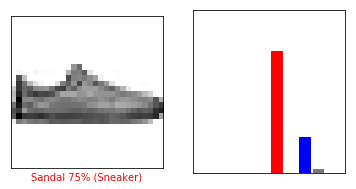

In [0]:
i =12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

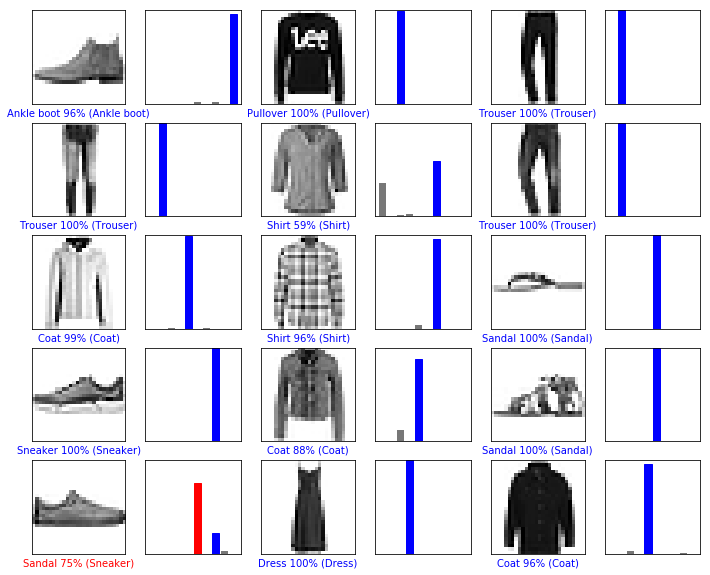

In [0]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize = (2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [0]:
def plot_test(i, pred, test_label, img):
  pred_i, test_label_i, img_i = pred[i], test_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img_i, cmap = plt.cm.binary)
  pred_label = np.argmax(pred_i)
  if pred_label == test_label_i:
     cor = "blue"
  else:
     cor = "red"
      
  plt.xlabel("{} {:2.0f} ({})".format(class_names[pred_label], 100*np.max(pred_i),class_names[test_label_i]))
  

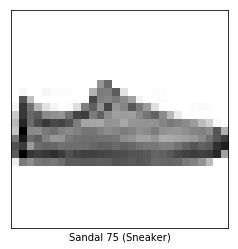

In [0]:
plot_test(12, predictions, test_labels, test_images)

In [0]:
def pre_bar (i, pred, test_label):
  pred_i, test_label_i = pred[i], test_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  bar = plt.bar(range(10), pred_i,color="#777777")
  plt.ylim([0,1])
  pred_label = np.argmax(pred_i)
  
  bar[pred_label].set_color("red")
  bar[test_label_i].set_color("blue")

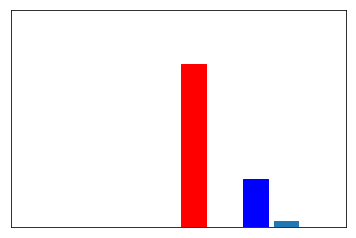

In [0]:
pre_bar(12, predictions, test_labels)

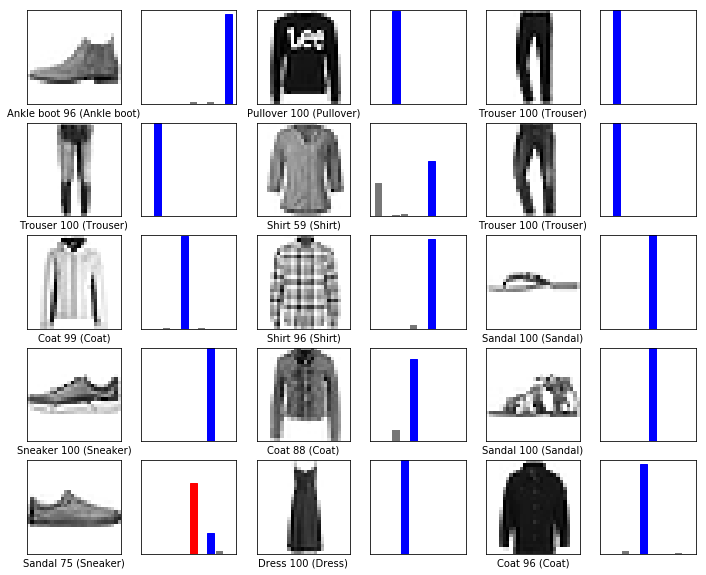

In [0]:
nrow, ncol = 5,3
subp = nrow * ncol
plt.figure(figsize = (2*2*ncol, 2*nrow))
for i in range(subp):
  plt.subplot(nrow, 2*ncol, 2*i+1)
  plot_test(i, predictions, test_labels, test_images)
  plt.subplot(nrow, 2*ncol, 2*i+2)
  pre_bar(i, predictions, test_labels)
plt.show()